In [44]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import minimize


## Activity 1

### Plot data sets for N=10, N=100, N=1000

In [12]:
N1 = 10
N2 = 100
N3 = 1000

# Generate x (uniform distribution between 0 and 1)
xvals_N1 = np.linspace(0,1,N1)
xvals_N2 = np.linspace(0,1,N2)
xvals_N3 = np.linspace(0,1,N3)

# Generate function
yvals_N1 = np.sin(2 * np.pi* xvals_N1)
yvals_N2 = np.sin(2 * np.pi* xvals_N2)
yvals_N3 = np.sin(2 * np.pi* xvals_N3)

In [13]:
# Add Gaussian noise
noise1 = np.random.normal(0,0.3,N1)
noise2 = np.random.normal(0,0.3,N2)
noise3 = np.random.normal(0,0.3,N3)

noisy_yvals1 = yvals_N1 + noise1
noisy_yvals2 = yvals_N2 + noise2
noisy_yvals3 = yvals_N3 + noise3


<function matplotlib.pyplot.show(close=None, block=None)>

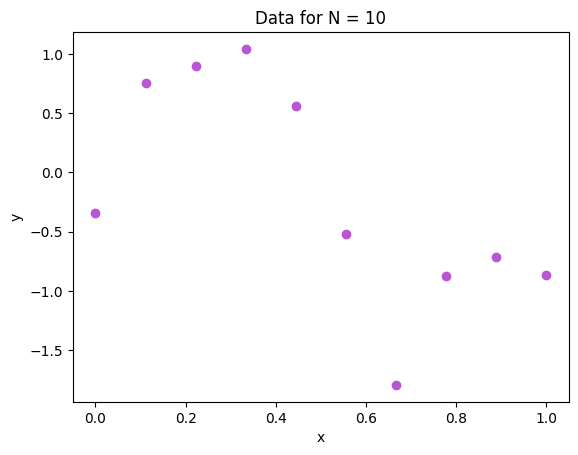

In [14]:
# Plot y vs. x
#plt.scatter(xvals_N1, yvals_N1, label="clean signal", color="hotpink")
plt.scatter(xvals_N1, noisy_yvals1, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 10")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

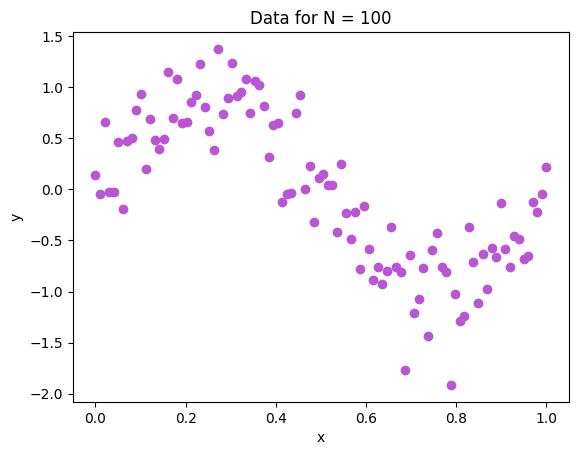

In [15]:
#plt.scatter(xvals_N2, yvals_N2, label="clean signal", color="hotpink")
plt.scatter(xvals_N2, noisy_yvals2, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 100")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

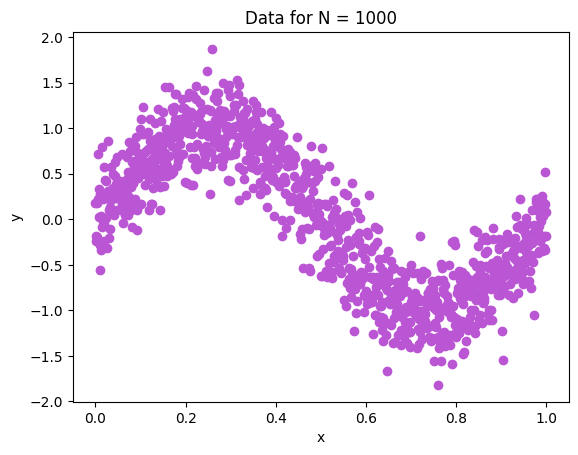

In [16]:
#plt.scatter(xvals_N3, yvals_N3, label="clean signal", color="hotpink")
plt.scatter(xvals_N3, noisy_yvals3, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 1000")
#plt.legend()
plt.show

### Polynomial fit to target data set with polynomials 1-9

In [56]:
def plot_polynomial(x, y):
    x_plot = np.linspace(0, 1, 1000)

    plt.figure()  # create ONE figure

    # plot data once
    plt.scatter(x, y, color="mediumorchid", marker="o", label="data")

    for degree in range(1, 10):
        coefficients = np.polyfit(x, y, degree)

        y_fit = []
        for j in range(len(x_plot)):
            x_iteration = x_plot[j]
            y_fitted = 0
            for i in range(degree + 1):
                y_fitted += coefficients[i] * (x_iteration)**(degree - i)
            y_fit.append(y_fitted)

        plt.plot(x_plot, y_fit, label=f"degree {degree}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial fits (degrees 1–9)")
    plt.legend()
    plt.show()

#### For N = 10

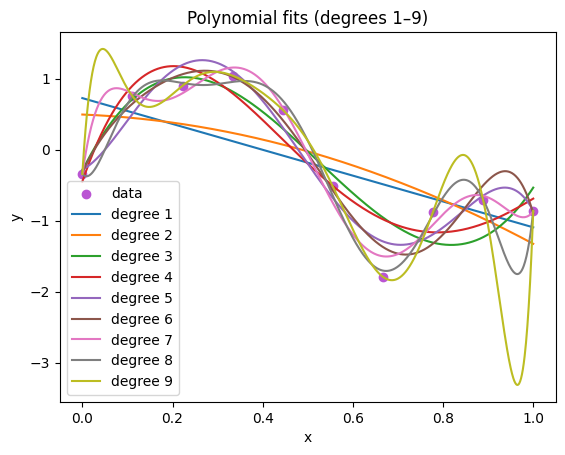

In [57]:
plot_polynomial(xvals_N1, noisy_yvals1)


#### For N = 100

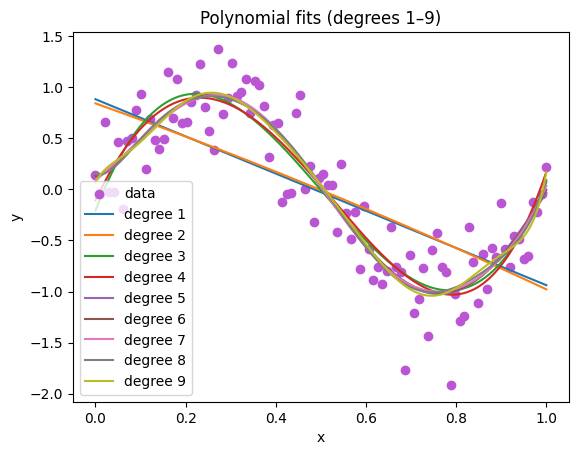

In [58]:
plot_polynomial(xvals_N2, noisy_yvals2)

#### For N = 1000

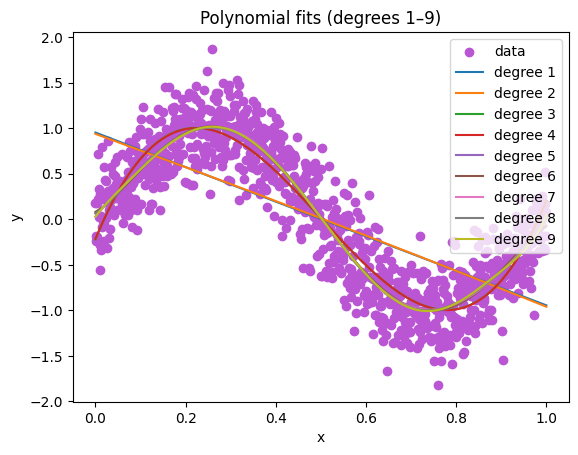

In [54]:
plot_polynomial(xvals_N3, noisy_yvals3)

## Activity 2

#### Plots of M = 9 polynomiclas fitted to the datat set using the regularized error function (1.4) for two values of the regularization parameter $\lambda$ corresponding to ln $\lambda$ = -18 and ln $\lambda$ = 0.

ln(lambda) = -18
w = [-3.21925730e-01  2.05514349e+01 -1.69948790e+02  7.41525745e+02
 -1.39609852e+03  4.56834163e+02  1.17628983e+03 -2.32588952e+02
 -1.34875384e+03  7.51636326e+02]

ln(lambda) = 0
w = [ 0.28022645 -0.39455088 -0.47336214 -0.34244782 -0.20336254 -0.09372744
 -0.0143888   0.0411176   0.07935603  0.10548641]



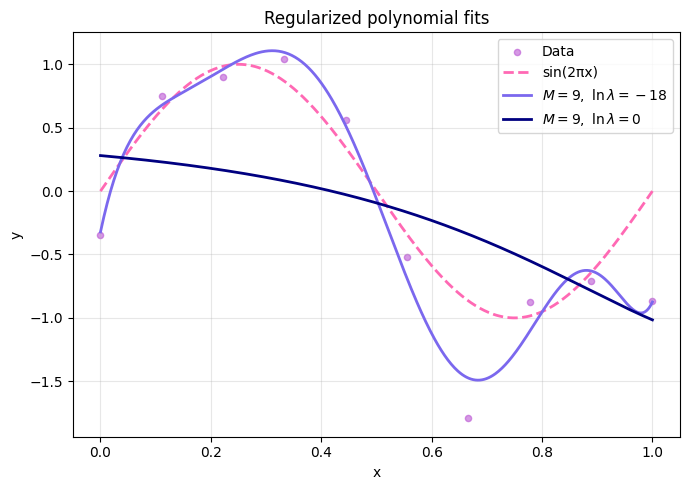

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Dataset 
x = xvals_N1
t = noisy_yvals1

# Degree M = 9
M = 9

def poly_model(x, w):
    y = np.zeros_like(x, dtype=float)
    for j in range(len(w)):
        y += w[j] * (x ** j)
    return y

def E_tilde(w, x, t, lam):
    residuals = poly_model(x, w) - t
    misfit_term = 0.5 * np.sum(residuals**2)
    reg_term  = 0.5 * lam * np.sum(w**2)
    return misfit_term + reg_term

ln_lambdas = [-18, 0]
fits = {}

for ln_lam in ln_lambdas:
    lam = np.exp(ln_lam)

    w0 = np.zeros(M + 1)
    result = minimize(E_tilde, w0, args=(x, t, lam))
    w_hat = result.x

    fits[ln_lam] = w_hat

    print(f"ln(lambda) = {ln_lam}")
    print("w =", w_hat)
    print()

# Plot
x_fine = np.linspace(0, 1, 500)

plt.figure(figsize=(7, 5))
plt.scatter(x, t, s=20, alpha=0.6, color="mediumorchid", label="Data")
plt.plot(x_fine, np.sin(2*np.pi*x_fine), "--", color="hotpink", lw=2, label="sin(2πx)")

colors = ["mediumslateblue", "navy"]

for (ln_lam, w_hat), color in zip(fits.items(), colors):
    plt.plot(
        x_fine,
        poly_model(x_fine, w_hat),
        lw=2,
        color=color,
        label=fr"$M=9,\ \ln\lambda={ln_lam}$"
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regularized polynomial fits")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
